In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
sns.set(style='white', context='notebook', palette='deep')

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
IDtest = test.PassengerId

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Drop outliers

In [4]:
def detect_outliers(df, n, features):
    outiler_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outiler_step = 1.5*IQR
        outiler_list_col = df[(df[col] > Q3+outiler_step) | (df[col] < Q1-outiler_step)].index
        outiler_indices.extend(outiler_list_col)
    
    outiler_indices = Counter(outiler_indices)
    outiler_rst = [k for k, v in outiler_indices.items() if v > n]
    return outiler_rst

In [5]:
outliers_idx = detect_outliers(train, 2, ["Age", "SibSp", "Parch", "Fare"])
train = train.drop(outliers_idx, axis=0).reset_index(drop=True)

/Users/chen/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


### Join train and test

In [6]:
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

### Missing value

In [7]:
dataset.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [8]:
dataset = dataset.fillna(np.nan)
dataset.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1043.000000,1298.000000,1299.000000,1299.000000,1299.000000,1299.000000,881.000000
mean,29.903806,32.569058,0.372594,657.093149,2.294072,0.452656,0.385925
std,14.427548,50.694652,0.857157,377.743244,0.837150,0.879416,0.487090
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,331.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,657.000000,3.000000,0.000000,0.000000
75%,39.000000,30.646850,0.000000,984.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [9]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

### Feature Analysis

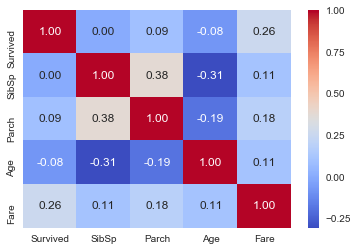

In [10]:
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

#### SibSp

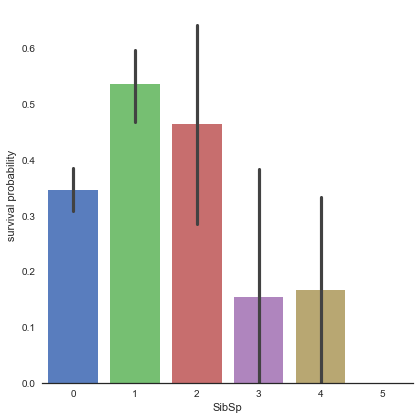

In [11]:
g = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

#### Parch

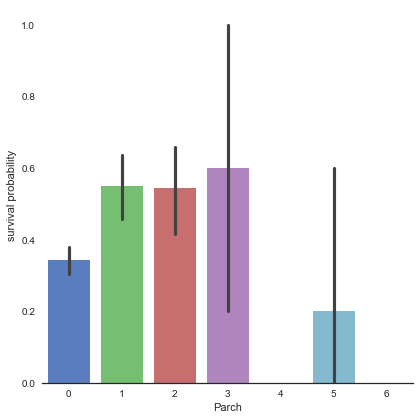

In [12]:
# Explore Parch feature vs Survived
g  = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

#### Age

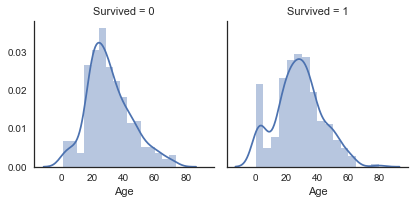

In [25]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

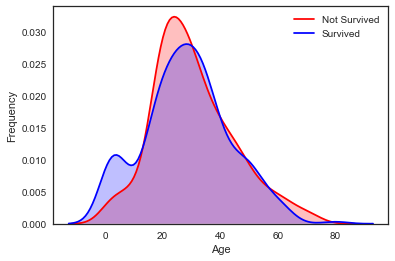

In [23]:
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax=g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

#### Fare

In [31]:
dataset.Fare.isnull().sum()

1

In [32]:
dataset.Fare = dataset.Fare.fillna(dataset['Fare'].mean())

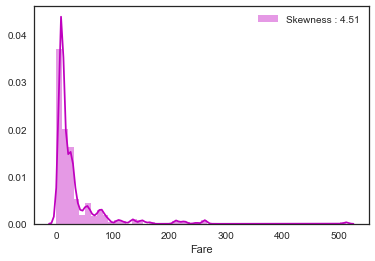

In [39]:
g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

In [40]:
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

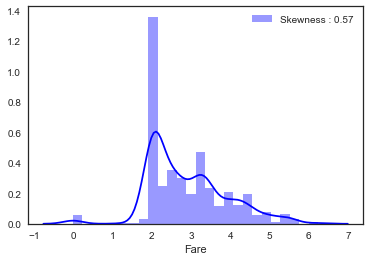

In [41]:
g = sns.distplot(dataset["Fare"], color="b", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

#### Sex

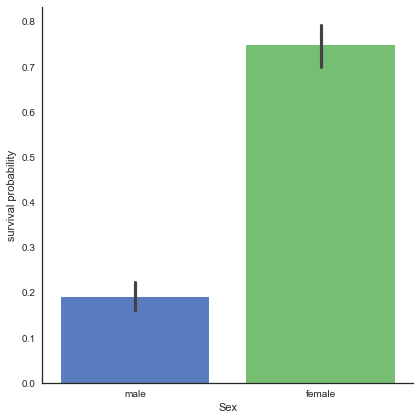

In [43]:
g  = sns.factorplot(x="Sex",y="Survived",data=train,kind="bar", size = 6 , palette = "muted")
g = g.set_ylabels("survival probability")

In [44]:
train[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


#### Pclass

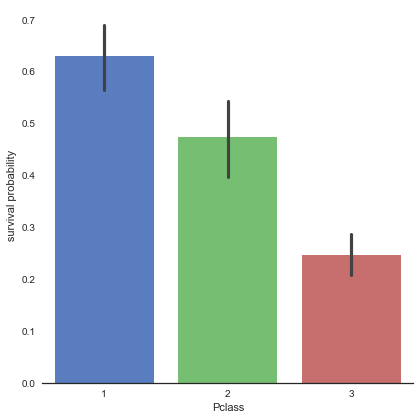

In [45]:
g = sns.factorplot(x="Pclass",y="Survived",data=train,kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

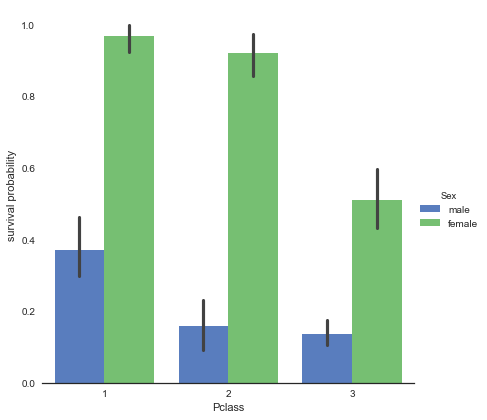

In [50]:
# Explore Pclass vs Survived by Sex
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

#### Embarked

In [51]:
dataset["Embarked"].isnull().sum()

2

In [59]:
dataset.Embarked.describe()

count     1297
unique       3
top          S
freq       904
Name: Embarked, dtype: object

In [70]:
dataset.Embarked = dataset.Embarked.fillna('S')

In [71]:
dataset.Embarked.describe()

count     1299
unique       3
top          S
freq       906
Name: Embarked, dtype: object

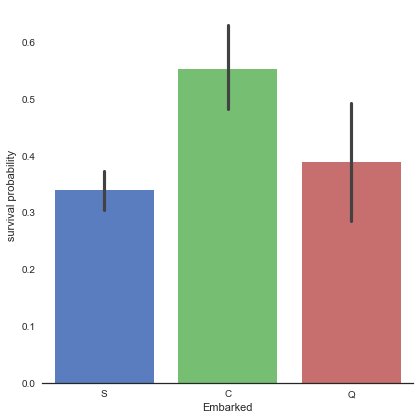

In [74]:
# Explore Embarked vs Survived 
g = sns.factorplot(x="Embarked", y="Survived", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

### Missing Value

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 12 columns):
Age            1043 non-null float64
Cabin          292 non-null object
Embarked       1299 non-null object
Fare           1299 non-null float64
Name           1299 non-null object
Parch          1299 non-null int64
PassengerId    1299 non-null int64
Pclass         1299 non-null int64
Sex            1299 non-null object
SibSp          1299 non-null int64
Survived       881 non-null float64
Ticket         1299 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 121.9+ KB


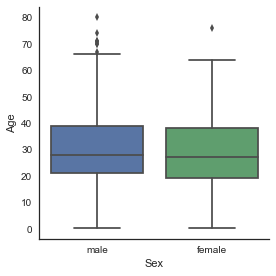

In [80]:
g = sns.factorplot(y="Age",x="Sex",data=dataset,kind="box")

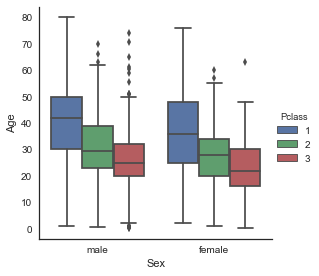

In [81]:
g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind="box")

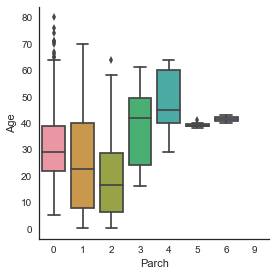

In [82]:
g = sns.factorplot(y="Age",x="Parch", data=dataset,kind="box")

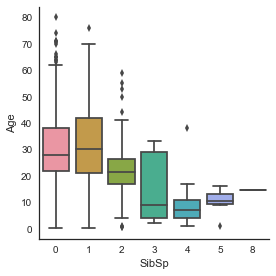

In [83]:
g = sns.factorplot(y="Age",x="SibSp", data=dataset,kind="box")

In [84]:
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})

In [85]:
dataset.describe()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
count,1043.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,881.000000
mean,29.903806,2.897710,0.372594,657.093149,2.294072,0.354888,0.452656,0.385925
std,14.427548,0.994817,0.857157,377.743244,0.837150,0.478664,0.879416,0.487090
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,21.000000,2.066331,0.000000,331.500000,2.000000,0.000000,0.000000,0.000000
50%,28.000000,2.670985,0.000000,657.000000,3.000000,0.000000,0.000000,0.000000
75%,39.000000,3.424126,0.000000,984.500000,3.000000,1.000000,1.000000,1.000000
max,80.000000,6.238967,9.000000,1309.000000,3.000000,1.000000,8.000000,1.000000


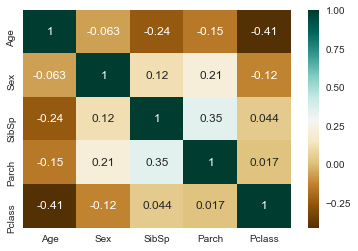

In [86]:
g = sns.heatmap(dataset[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

In [137]:
index_NaN_age = list(dataset[dataset.Age.isnull()].index)

for i in index_NaN_age :
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_med

/Users/chen/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


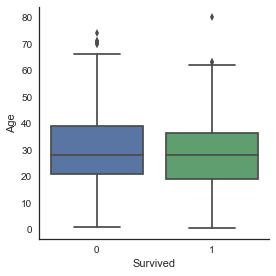

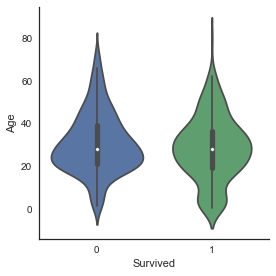

In [138]:
g = sns.factorplot(x="Survived", y = "Age",data = train, kind="box")
g = sns.factorplot(x="Survived", y = "Age",data = train, kind="violin")

### Feature Engineering

#### Name

In [149]:
title_list = [i.split(',')[1].split('.')[0].strip() for i in dataset.Name]
dataset['Title'] = pd.Series(title_list)

In [152]:
dataset

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,Mr
1,38.0,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,Mrs
4,35.0,NaN,S,2.085672,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,Mr
5,25.0,NaN,Q,2.135148,"Moran, Mr. James",0,6,3,0,0,0.0,330877,Mr
6,54.0,E46,S,3.948596,"McCarthy, Mr. Timothy J",0,7,1,0,0,0.0,17463,Mr
7,2.0,NaN,S,3.048088,"Palsson, Master. Gosta Leonard",1,8,3,0,3,0.0,349909,Master
8,27.0,NaN,S,2.409941,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,1,0,1.0,347742,Mrs
9,14.0,NaN,C,3.403555,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,1.0,237736,Mrs


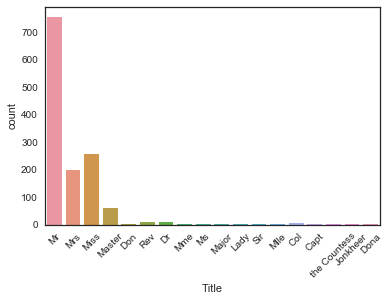

In [154]:
g = sns.countplot(x="Title",data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45) 

In [155]:
# Convert to categorical values Title 
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

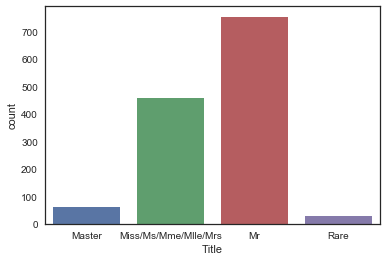

In [161]:
g = sns.countplot(dataset["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

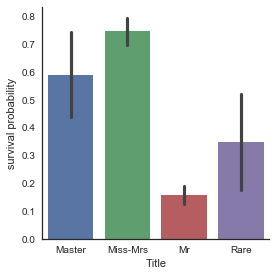

In [162]:
g = sns.factorplot(x="Title",y="Survived",data=dataset,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

In [163]:
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

#### Family Size

In [164]:
dataset["Fsize"] = dataset["SibSp"] + dataset["Parch"] + 1

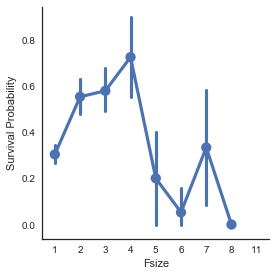

In [169]:
g = sns.factorplot(x="Fsize",y="Survived",data = dataset)
g = g.set_ylabels("Survival Probability")

In [170]:
# Create new feature of family size
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

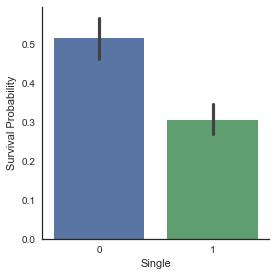

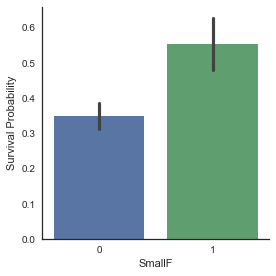

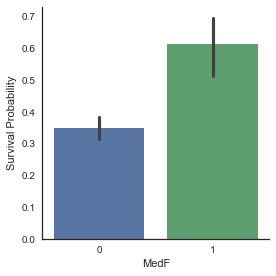

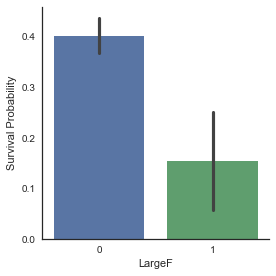

In [171]:
g = sns.factorplot(x="Single",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="LargeF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")

In [172]:
dataset = pd.get_dummies(dataset, columns = ["Title"])
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")

#### Cabin

In [173]:
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

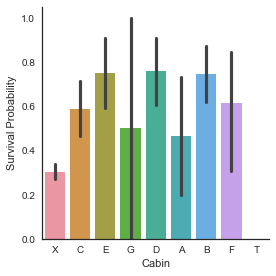

In [175]:
g = sns.factorplot(y="Survived",x="Cabin",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")

In [176]:
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")

#### Ticket

In [180]:
Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
    
dataset["Ticket"] = Ticket

In [184]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

In [185]:
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc")

In [186]:
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [187]:
dataset.head()

,Age,Fare,Parch,Sex,SibSp,Survived,Fsize,Single,SmallF,MedF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,22.0,1.981001,0,0,1,0.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,4.266662,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,2.070022,0,1,0,1.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,35.0,3.972177,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,35.0,2.085672,0,0,0,0.0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


### Modeling

In [191]:
train_len = len(train)
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

/Users/chen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [193]:
test

,Age,Fare,Parch,Sex,SibSp,Fsize,Single,SmallF,MedF,LargeF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
881,34.5,2.057860,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
882,47.0,1.945910,0,1,1,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
883,62.0,2.270836,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
884,27.0,2.159003,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
885,22.0,2.508582,1,1,1,3,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
886,14.0,2.221917,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
887,30.0,2.031983,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
888,26.0,3.367296,1,0,1,3,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
889,18.0,1.978128,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
890,21.0,3.184284,0,0,2,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [194]:
train["Survived"] = train["Survived"].astype(int)

Y_train = train["Survived"]

X_train = train.drop(labels = ["Survived"],axis = 1)

/Users/chen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
